In [1]:
# Example taken from ISL, James, Hastie

In [3]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.notebook_repr_html', False)
 
%matplotlib inline
plt.style.use('seaborn-white')

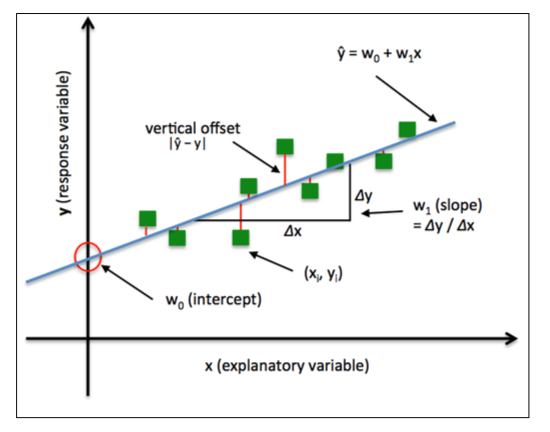

In [42]:
from IPython.display import Image
Image(filename="/Users/jam3jam/Desktop/reg.png")
# Credits:  Python Machine Learning - Sebastian Raschka

In [4]:
advertising = pd.read_csv('/Users/toddmoffett1/DSI/dsi_repo/DSI_SM_3/data/', usecols=[1,2,3,4])
advertising.info()
advertising.head()

IOError: File /Users/toddmoffett1/DSI/dsi_repo/DSI_SM_3/data/Advertising.csv does not exist

In [10]:
advertising.describe()

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

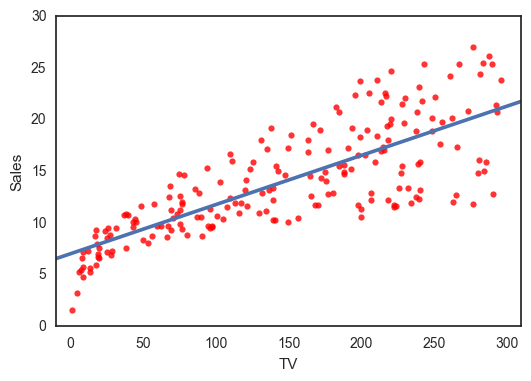

In [11]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r'})
plt.xlim(-10,310) 
plt.ylim(ymin=0);

In [16]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,7.0326,0.458,15.360,0.000,6.130 7.935
TV,0.0475,0.003,17.668,0.000,0.042 0.053


We can conclude that in the absence of any advertising, sales will, on average, fall somewhere between 6,130 and 7,940 units.  <br><br>
Further, for each 1,000 dollars increase in television advertising, there will be an average increase in sales between 42 and 53 units.

In [13]:
print 7.0326 - .458*1.96, 7.0326 + .458*1.96, 

6.13492 7.93028


In statistics, the residual sum of squares (RSS) is the sum of the squares of residuals (deviations predicted from actual empirical values of data). It is a measure of the discrepancy between the data and an estimation model. A small RSS indicates a tight fit of the model to the data. It is used as an optimality criterion in parameter selection and model selection.

In [17]:
# RSS with regression coefficients

((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

# SUM( (Actual Values - Estimate)**2  )

2.1025305831313506

In [18]:
regr = skl_lm.LinearRegression()

X = advertising.TV.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.03259354913
[ 0.04753664]


In [19]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.61187505085007099

In [21]:
est = smf.ols('Sales ~ Radio', advertising).fit()
est.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.332
Model:,OLS,Adj. R-squared:,0.329
Method:,Least Squares,F-statistic:,98.42
Date:,"Mon, 19 Dec 2016",Prob (F-statistic):,4.35e-19
Time:,12:43:54,Log-Likelihood:,-573.34
No. Observations:,200,AIC:,1151.
Df Residuals:,198,BIC:,1157.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [22]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
est.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.052
Model:,OLS,Adj. R-squared:,0.047
Method:,Least Squares,F-statistic:,10.89
Date:,"Mon, 19 Dec 2016",Prob (F-statistic):,0.00115
Time:,12:44:01,Log-Likelihood:,-608.34
No. Observations:,200,AIC:,1221.
Df Residuals:,198,BIC:,1227.
Df Model:,1,,
Covariance Type:,nonrobust,,


## Multiple Linear Regression

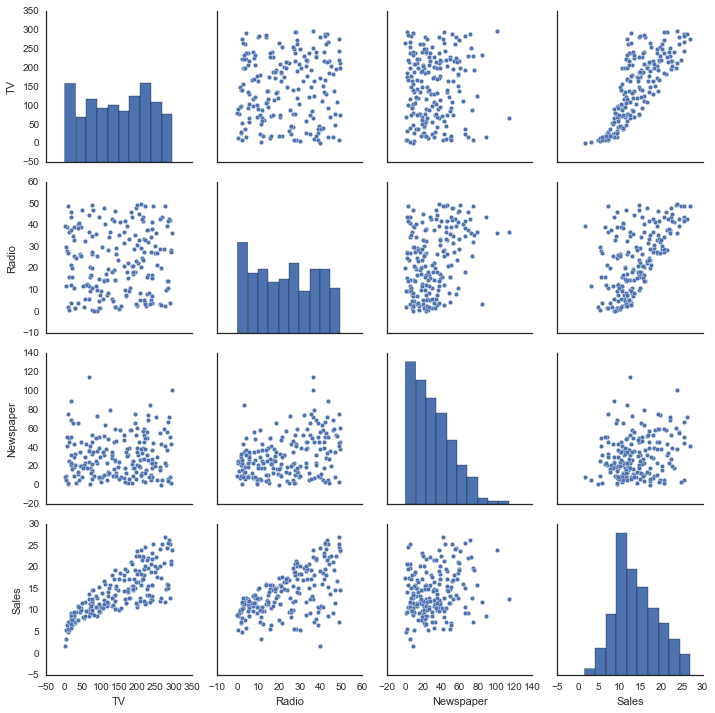

In [15]:
advertising.corr()
sns.pairplot(advertising)

In [16]:
# est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
est = smf.ols('Sales ~ TV + Radio + TV*Radio', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 21 Nov 2016   Prob (F-statistic):          6.68e-146
Time:                        10:25:44   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000         6.261     7.239
TV             0.0191      0.002     12.699      0.000         0.016     0.022
Radio          0.0289      0.009      3.241      0.001         0.011     0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000         0.001     0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
regr = skl_lm.LinearRegression()

X = advertising[['Radio', 'TV']].as_matrix()
y = advertising.Sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[ 0.18799423  0.04575482]
2.92109991241


In [27]:
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['Radio', 'TV']].describe()

            Radio          TV
count  200.000000  200.000000
mean    23.264000  147.042500
std     14.846809   85.854236
min      0.000000    0.700000
25%      9.975000   74.375000
50%     22.900000  149.750000
75%     36.525000  218.825000
max     49.600000  296.400000

In [28]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

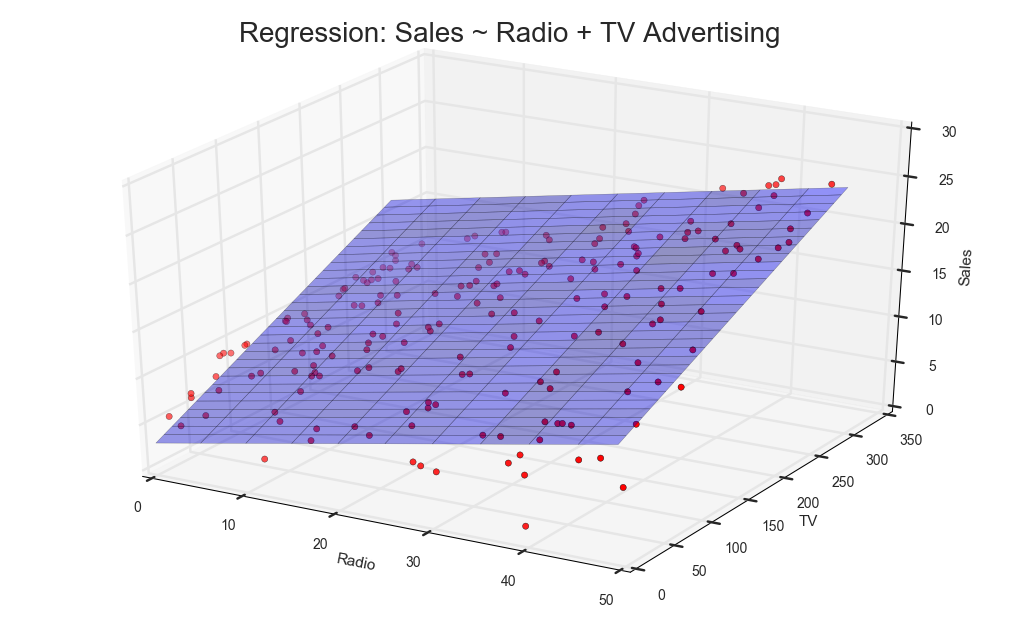

In [29]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.Radio, advertising.TV, advertising.Sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

In [139]:
# p. 102, ISL - VIF VALUES

est_TV = smf.ols('TV ~ Newspaper + Radio', advertising).fit()
est_Newspaper = smf.ols('Newspaper ~ TV + Radio', advertising).fit()
est_Radio = smf.ols('Radio ~ TV + Newspaper', advertising).fit()

print(1/(1-est_TV.rsquared))
print(1/(1-est_Newspaper.rsquared))
print(1/(1-est_Radio.rsquared))

1.00461078494
1.14518737872
1.14495191711


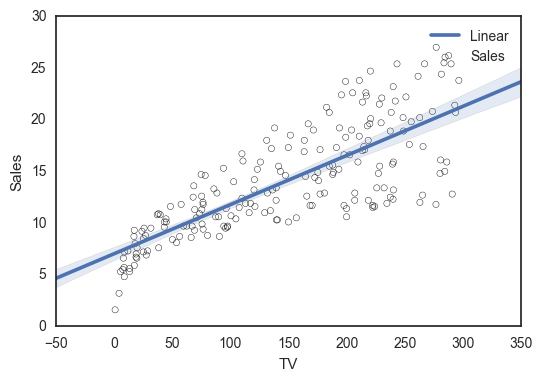

In [33]:
plt.scatter(advertising.TV, advertising.Sales, facecolors='None', edgecolors='k') 
sns.regplot(advertising.TV, advertising.Sales, ci=95, label='Linear', scatter=False)
#sns.regplot(advertising.TV, advertising.Sales, ci=None, label='Degree 2', order=2, scatter=False)
#sns.regplot(advertising.TV, advertising.Sales, ci=None, label='Degree 3', order=3, scatter=False)

plt.legend()
# plt.ylim(5,55)
# plt.xlim(40,240);

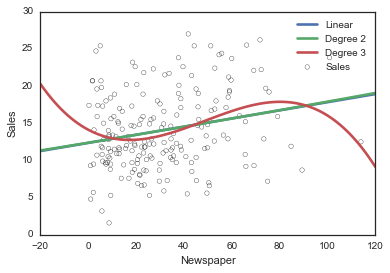

In [24]:
plt.scatter(advertising.Newspaper, advertising.Sales, facecolors='None', edgecolors='k') 
sns.regplot(advertising.Newspaper, advertising.Sales, ci=None, label='Linear', scatter=False)
sns.regplot(advertising.Newspaper, advertising.Sales, ci=None, label='Degree 2', order=2, scatter=False)
sns.regplot(advertising.Newspaper, advertising.Sales, ci=None, label='Degree 3', order=3, scatter=False)

plt.legend()
# plt.ylim(5,55)
# plt.xlim(40,240);

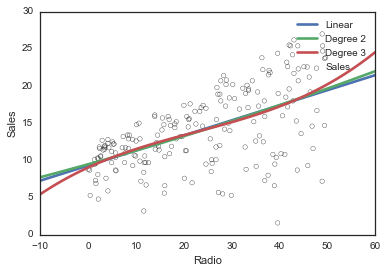

In [135]:
plt.scatter(advertising.Radio, advertising.Sales, facecolors='None', edgecolors='k') 
sns.regplot(advertising.Radio, advertising.Sales, ci=None, label='Linear', scatter=False)
sns.regplot(advertising.Radio, advertising.Sales, ci=None, label='Degree 2', order=2, scatter=False)
sns.regplot(advertising.Radio, advertising.Sales, ci=None, label='Degree 3', order=3, scatter=False)

plt.legend()
# plt.ylim(5,55)
# plt.xlim(40,240);

In [136]:
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


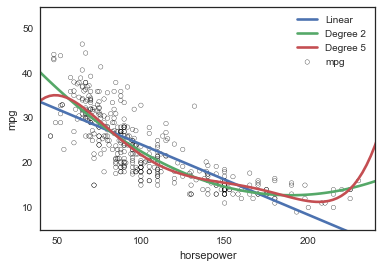

In [140]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k') 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [1]:
!pwd

/Users/jam3jam/dsi/PYTHON_ISL/ISLR-python/Notebooks
